In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("C:/Users/Nitish/Desktop/Train ODI hackathon.csv")

In [6]:
df

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6
...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,Neutral,Neutral,Second,First,Jun,5
2504,1,14,138,0,Home,Away,First,Second,Jan,1
2505,14,5,135,15,Home,Away,Second,First,Apr,14
2506,15,14,64,16,Home,Away,First,Second,Nov,14


In [7]:
df.isnull().sum() # no null values

Team1            0
Team2            0
Stadium          0
HostCountry      0
Team1_Venue      0
Team2_Venue      0
Team1_Innings    0
Team2_Innings    0
MonthOfMatch     0
MatchWinner      0
dtype: int64

In [8]:
df.dtypes

Team1             int64
Team2             int64
Stadium           int64
HostCountry       int64
Team1_Venue      object
Team2_Venue      object
Team1_Innings    object
Team2_Innings    object
MonthOfMatch     object
MatchWinner       int64
dtype: object

In [9]:
df_grouped_team1=(df.groupby("Team1").size())
df_grouped_team2=(df.groupby("Team2").size())
print(df_grouped_team1)
print(df_grouped_team2)

Team1
0      26
1     386
2     138
3      32
4     259
5     364
6      49
7      50
8      20
9     253
10    250
11     22
12    185
13    176
14    171
15    127
dtype: int64
Team2
0      30
1     204
2      87
3      17
4     193
5     238
6      27
7      48
8      25
9     223
10    316
11     30
12    199
13    341
14    335
15    195
dtype: int64


In [10]:
df_total_matches_played=df_grouped_team1 + df_grouped_team2
df_total_matches_played # Total matches played by each team

Team1
0      56
1     590
2     225
3      49
4     452
5     602
6      76
7      98
8      45
9     476
10    566
11     52
12    384
13    517
14    506
15    322
dtype: int64

In [11]:
df_grouped_Matchwinner= df.groupby("MatchWinner").size() # Number of times each country won a match.
df_grouped_Matchwinner

MatchWinner
0      27
1     379
2      70
3       8
4     237
5     318
6      33
7      24
8      15
9     223
10    316
11     18
12    245
13    246
14    262
15     87
dtype: int64

In [12]:
df_Match_winning_percentage=df_grouped_Matchwinner/df_total_matches_played
df_Match_winning_percentage # Each country's winning percentage.

MatchWinner
0     0.482143
1     0.642373
2     0.311111
3     0.163265
4     0.524336
5     0.528239
6     0.434211
7     0.244898
8     0.333333
9     0.468487
10    0.558304
11    0.346154
12    0.638021
13    0.475822
14    0.517787
15    0.270186
dtype: float64

<BarContainer object of 16 artists>

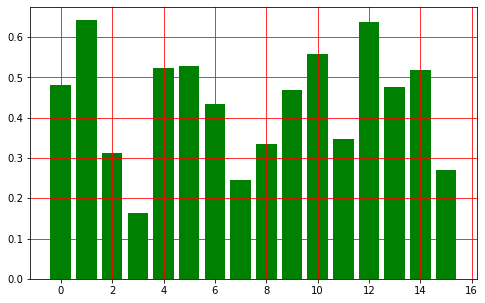

In [13]:
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize=(8,5))               # Bar showing the winning percentage based on the no. of matches each team played
plt.grid(color="Red")
plt.bar(x,df_Match_winning_percentage,color="Green")

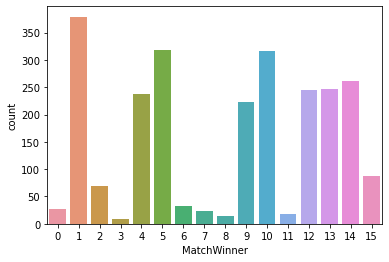

In [14]:
sns.countplot(x="MatchWinner",data=df)  # Bar chart showing count of total matches played.

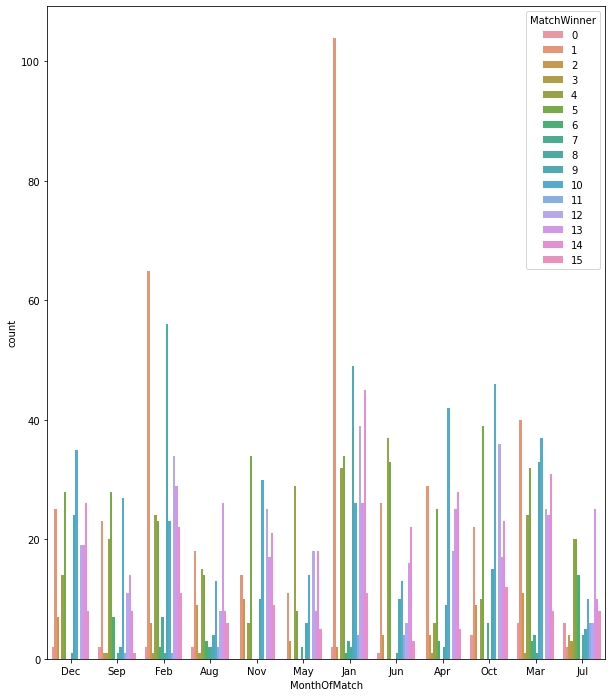

In [104]:
plt.figure(figsize=(10,12))
sns.countplot(x="MonthOfMatch",hue="MatchWinner",data=df)

In [15]:
df.groupby("Team1_Venue").size()

Team1_Venue
Away          1
Home       1797
Neutral     710
dtype: int64

In [16]:
df.groupby("Team2_Venue").size()

Team2_Venue
Away       1797
Home          1
Neutral     710
dtype: int64

In [17]:
#NOW I WILL FIND OUT HOW MANY AWAY AND HOME MATCHES EACH COUNTRY PLAYED

In [20]:
df_Team1_venues=df.groupby(["Team1","Team1_Venue"]).size().reset_index(name="size")
df_Team1_venues # Matches played by Team_1 grouped over the diff venues.

,Team1,Team1_Venue,size
0,0,Neutral,26
1,1,Home,286
2,1,Neutral,100
3,2,Home,104
4,2,Neutral,34
5,3,Home,10
6,3,Neutral,22
7,4,Home,190
8,4,Neutral,69
9,5,Home,205


In [21]:
df_Team2_venues=df.groupby(["Team2","Team2_Venue"]).size().reset_index(name="size")
df_Team2_venues # Matches played by Team_2 grouped over the diff venues.

,Team2,Team2_Venue,size
0,0,Away,30
1,1,Away,202
2,1,Neutral,2
3,2,Away,81
4,2,Neutral,6
5,3,Away,12
6,3,Neutral,5
7,4,Away,185
8,4,Neutral,8
9,5,Away,209


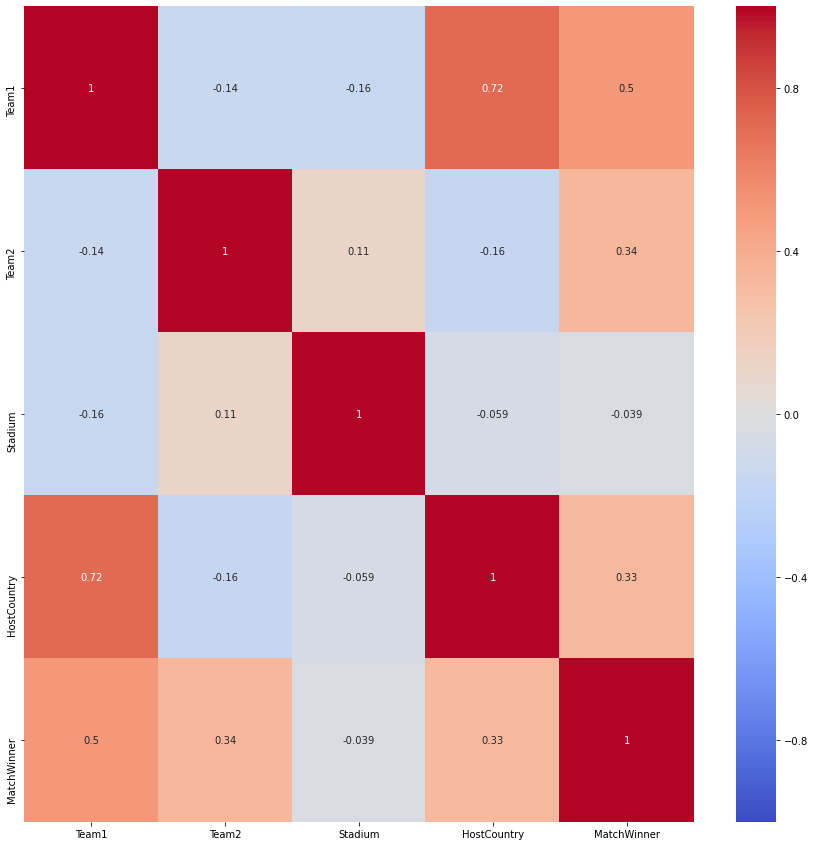

In [22]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True,
            cmap='coolwarm',vmin = -1, vmax = 1, center = 0)


In [23]:
df1=df.copy()

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['TEAM1_VENUE'] = le.fit_transform(df1['Team1_Venue'])
df1

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,TEAM1_VENUE
0,5,4,37,4,Home,Away,Second,First,Dec,4,1
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1,2
2,9,15,47,9,Home,Away,First,Second,Feb,9,1
3,7,2,102,6,Home,Away,First,Second,Aug,2,1
4,6,8,46,5,Home,Away,First,Second,Aug,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,Neutral,Neutral,Second,First,Jun,5,2
2504,1,14,138,0,Home,Away,First,Second,Jan,1,1
2505,14,5,135,15,Home,Away,Second,First,Apr,14,1
2506,15,14,64,16,Home,Away,First,Second,Nov,14,1


In [25]:
df1['TEAM2_VENUE'] = le.fit_transform(df1['Team2_Venue'])
df1

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,TEAM1_VENUE,TEAM2_VENUE
0,5,4,37,4,Home,Away,Second,First,Dec,4,1,0
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1,2,2
2,9,15,47,9,Home,Away,First,Second,Feb,9,1,0
3,7,2,102,6,Home,Away,First,Second,Aug,2,1,0
4,6,8,46,5,Home,Away,First,Second,Aug,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,Neutral,Neutral,Second,First,Jun,5,2,2
2504,1,14,138,0,Home,Away,First,Second,Jan,1,1,0
2505,14,5,135,15,Home,Away,Second,First,Apr,14,1,0
2506,15,14,64,16,Home,Away,First,Second,Nov,14,1,0


In [26]:
df1['MonthOfMatch'] = le.fit_transform(df1['MonthOfMatch'])
df1

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,TEAM1_VENUE,TEAM2_VENUE
0,5,4,37,4,Home,Away,Second,First,2,4,1,0
1,1,14,84,7,Neutral,Neutral,First,Second,11,1,2,2
2,9,15,47,9,Home,Away,First,Second,3,9,1,0
3,7,2,102,6,Home,Away,First,Second,1,2,1,0
4,6,8,46,5,Home,Away,First,Second,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,Neutral,Neutral,Second,First,6,5,2,2
2504,1,14,138,0,Home,Away,First,Second,4,1,1,0
2505,14,5,135,15,Home,Away,Second,First,0,14,1,0
2506,15,14,64,16,Home,Away,First,Second,9,14,1,0


In [27]:
dff1=df1.drop(["Team1_Venue","Team2_Venue"],axis=1)
dff1

,Team1,Team2,Stadium,HostCountry,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,TEAM1_VENUE,TEAM2_VENUE
0,5,4,37,4,Second,First,2,4,1,0
1,1,14,84,7,First,Second,11,1,2,2
2,9,15,47,9,First,Second,3,9,1,0
3,7,2,102,6,First,Second,1,2,1,0
4,6,8,46,5,First,Second,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,Second,First,6,5,2,2
2504,1,14,138,0,First,Second,4,1,1,0
2505,14,5,135,15,Second,First,0,14,1,0
2506,15,14,64,16,First,Second,9,14,1,0


In [28]:
df2=pd.get_dummies(dff1)
df2

,Team1,Team2,Stadium,HostCountry,MonthOfMatch,MatchWinner,TEAM1_VENUE,TEAM2_VENUE,Team1_Innings_First,Team1_Innings_Second,Team2_Innings_First,Team2_Innings_Second
0,5,4,37,4,2,4,1,0,0,1,1,0
1,1,14,84,7,11,1,2,2,1,0,0,1
2,9,15,47,9,3,9,1,0,1,0,0,1
3,7,2,102,6,1,2,1,0,1,0,0,1
4,6,8,46,5,1,6,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,6,5,2,2,0,1,1,0
2504,1,14,138,0,4,1,1,0,1,0,0,1
2505,14,5,135,15,0,14,1,0,0,1,1,0
2506,15,14,64,16,9,14,1,0,1,0,0,1


In [29]:
y=df2["MatchWinner"]
print(y)

0        4
1        1
2        9
3        2
4        6
        ..
2503     5
2504     1
2505    14
2506    14
2507     1
Name: MatchWinner, Length: 2508, dtype: int64


In [30]:
X=df2.drop("MatchWinner",axis=1)
X

,Team1,Team2,Stadium,HostCountry,MonthOfMatch,TEAM1_VENUE,TEAM2_VENUE,Team1_Innings_First,Team1_Innings_Second,Team2_Innings_First,Team2_Innings_Second
0,5,4,37,4,2,1,0,0,1,1,0
1,1,14,84,7,11,2,2,1,0,0,1
2,9,15,47,9,3,1,0,1,0,0,1
3,7,2,102,6,1,1,0,1,0,0,1
4,6,8,46,5,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2503,5,15,89,3,6,2,2,0,1,1,0
2504,1,14,138,0,4,1,0,1,0,0,1
2505,14,5,135,15,0,1,0,0,1,1,0
2506,15,14,64,16,9,1,0,1,0,0,1


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2,stratify=y)
print(X_train.shape)
print(X_test.shape)

(2006, 11)
(502, 11)


In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=1)
model.fit(X_train,y_train)

C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [33]:
params={"max_depth": [ 3, 5, 10, 12],"n_estimators":[100,120,150],"learning_rate":[0.1,0.3,0.5]}

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [47]:
from xgboost import XGBClassifier
model1=XGBClassifier(random_state=2)
random_search=GridSearchCV(model1,param_grid=params,n_jobs=-1)
random_search.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=2,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=N

In [66]:
model1=XGBClassifier(random_state=2,max_depth=3, n_estimators=120,learning_rate= 0.1)
model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
random_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}

In [67]:
predictions1=model1.predict_proba(X_test)
predictions1.shape

(502, 16)

In [68]:
from sklearn.metrics import log_loss
log_loss(y_test,predictions1)

0.7520374471536908

### SIMILARLY CHANGE TEST DATA 

In [43]:
df_test=pd.read_csv("C:/Users/Nitish/Desktop/Test.csv")
df_test

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
0,2,4,34,1,Home,Away,First,Second,Oct
1,14,1,19,15,Home,Away,First,Second,Mar
2,9,10,130,14,Neutral,Neutral,Second,First,Dec
3,9,10,8,9,Home,Away,First,Second,Dec
4,5,15,130,14,Neutral,Neutral,First,Second,Oct
...,...,...,...,...,...,...,...,...,...
1070,15,5,64,16,Home,Away,First,Second,Jun
1071,1,12,95,0,Home,Away,First,Second,Feb
1072,5,10,43,1,Neutral,Neutral,First,Second,Mar
1073,10,13,111,0,Neutral,Neutral,Second,First,Mar


In [44]:
df_test.isnull().sum()

Team1            0
Team2            0
Stadium          0
HostCountry      0
Team1_Venue      0
Team2_Venue      0
Team1_Innings    0
Team2_Innings    0
MonthOfMatch     0
dtype: int64

In [45]:
dff_test1=df_test.copy()

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dff_test1['TEAM1_VENUE'] = le.fit_transform(dff_test1['Team1_Venue'])

dff_test1['TEAM2_VENUE'] = le.fit_transform(dff_test1['Team2_Venue'])
dff_test1['MonthOfMatch'] = le.fit_transform(dff_test1['MonthOfMatch'])


In [47]:
dff_test1=dff_test1.drop(["Team1_Venue","Team2_Venue"],axis=1)
dff_test1

,Team1,Team2,Stadium,HostCountry,Team1_Innings,Team2_Innings,MonthOfMatch,TEAM1_VENUE,TEAM2_VENUE
0,2,4,34,1,First,Second,10,0,0
1,14,1,19,15,First,Second,7,0,0
2,9,10,130,14,Second,First,2,1,1
3,9,10,8,9,First,Second,2,0,0
4,5,15,130,14,First,Second,10,1,1
...,...,...,...,...,...,...,...,...,...
1070,15,5,64,16,First,Second,6,0,0
1071,1,12,95,0,First,Second,3,0,0
1072,5,10,43,1,First,Second,7,1,1
1073,10,13,111,0,Second,First,7,1,1


In [48]:
dff_test2=pd.get_dummies(dff_test1)
dff_test2

,Team1,Team2,Stadium,HostCountry,MonthOfMatch,TEAM1_VENUE,TEAM2_VENUE,Team1_Innings_First,Team1_Innings_Second,Team2_Innings_First,Team2_Innings_Second
0,2,4,34,1,10,0,0,1,0,0,1
1,14,1,19,15,7,0,0,1,0,0,1
2,9,10,130,14,2,1,1,0,1,1,0
3,9,10,8,9,2,0,0,1,0,0,1
4,5,15,130,14,10,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1070,15,5,64,16,6,0,0,1,0,0,1
1071,1,12,95,0,3,0,0,1,0,0,1
1072,5,10,43,1,7,1,1,1,0,0,1
1073,10,13,111,0,7,1,1,0,1,1,0


In [49]:
predictions2=model1.predict_proba(dff_test2)
predictions2.shape

(1075, 16)

In [50]:
Output=pd.DataFrame(predictions2)
Output

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000041,0.000038,0.944233,0.000113,0.042314,0.012201,0.000064,0.000083,0.000040,0.000207,0.000135,0.000029,0.000071,0.000335,0.000053,0.000043
1,0.000137,0.897374,0.000467,0.000418,0.000788,0.000751,0.000057,0.000151,0.000066,0.000132,0.000074,0.000093,0.000772,0.000224,0.098261,0.000235
2,0.000325,0.000108,0.000030,0.000040,0.001593,0.000042,0.000078,0.000296,0.000116,0.263906,0.730902,0.000076,0.001819,0.000119,0.000470,0.000081
3,0.000019,0.000028,0.000007,0.000010,0.000071,0.000036,0.000040,0.000008,0.000047,0.165719,0.833673,0.000018,0.000059,0.000113,0.000140,0.000012
4,0.000466,0.000253,0.000169,0.000120,0.000712,0.838937,0.000153,0.000433,0.000416,0.002760,0.005886,0.000383,0.003697,0.003156,0.001099,0.141361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,0.000025,0.000196,0.000094,0.000013,0.000023,0.982733,0.000026,0.000038,0.000019,0.000178,0.000015,0.000067,0.000212,0.000097,0.000493,0.015772
1071,0.000053,0.866338,0.000246,0.000133,0.000726,0.000805,0.000068,0.000105,0.000081,0.000762,0.000584,0.000088,0.129476,0.000086,0.000314,0.000132
1072,0.000055,0.000064,0.000100,0.000068,0.000283,0.711060,0.000056,0.000071,0.000086,0.001226,0.284539,0.000093,0.000238,0.001351,0.000310,0.000400
1073,0.000543,0.001356,0.001484,0.000514,0.012163,0.014307,0.000701,0.000884,0.000911,0.002405,0.890168,0.000508,0.009664,0.060828,0.002961,0.000602


In [51]:
Output.to_excel("ODI_MATCH_PREDICTION3.xlsx",index=False)